In [ ]:
#
#
#
#

In [53]:
import numpy as np
import pandas as pd
import random
import keras
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

print(keras.__version__)

2.1.2


In [2]:
rawdata = pd.read_csv("../data/titanic/train.csv")
rawdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
print("Unique values for 'SibSp': ",rawdata["SibSp"].unique())
print("Unique values for 'Parch': ",rawdata["Parch"].unique())
print("Max value for 'Fare': ",rawdata["Fare"].max())
print("Min value for 'Fare': ",rawdata["Fare"].min())
print("Max value for 'Age': ",rawdata["Age"].max())
print("Min value for 'Age': ",rawdata["Age"].min())
print("Unique values for 'Pclass': ",rawdata["Pclass"].unique())
print("Unique values for 'Sex': ",rawdata["Sex"].unique())

Unique values for 'SibSp':  [1 0 3 4 2 5 8]
Unique values for 'Parch':  [0 1 2 5 3 4 6]
Max value for 'Fare':  512.3292
Min value for 'Fare':  0.0
Max value for 'Age':  80.0
Min value for 'Age':  0.42
Unique values for 'Pclass':  [3 1 2]
Unique values for 'Sex':  ['male' 'female']


In [5]:
def split(mydata,test_ratio=0.7):
    n = len(mydata)
    shuffled_i = np.random.permutation(n)
    test_no = int(n*test_ratio)
    test_indices = shuffled_i[:test_no]
    train_indices = shuffled_i[test_no:]
    return(mydata.iloc[test_indices],mydata.iloc[train_indices])

In [6]:
def isKid(mydata,age=15):
    mydata["IsKid"] = [1 if x<15 else 0 for x in mydata["Age"]]
    return(mydata)

In [7]:
def dummy(mydata,col,values):
    for i in values:
        mydata[str(i)] = [1 if x == i else 0 for x in mydata[col]]
    return(mydata)

In [8]:
def isAlone(mydata):
    mydata["Alone"] = [1 if mydata["SibSp"][x] == 0 and mydata["Parch"][x] == 0 else 0 for x in range(len(mydata))]
    return(mydata)

In [9]:
def segmentAge(mydata):
    mydata["AgeSeg"] = [round(int(x),-1) for x in mydata["Age"]]
    return(mydata)



In [10]:
def makeSegment(data,column,segments):
    if segments <= 1:
        return(data)
    temp = data[column].sort()
    

In [11]:
def crossColumns(data,columns):
    temp = []
    finished = []
    for first_column in columns:
        finished.append(first_column)
        for second_column in [x for x in columns if x not in finished]:
#             finished.append(second_column)
#             temp.append(finished)
#             non_orig = False
#             for i in temp:
#                 if second_column in i and first_column in i:
#                     non_orig = True
#                     break
#             if non_orig == True:
#                 break
            #print(str(str(first_column)+" + "+str(second_column )))
            data[str(str(first_column)+" + "+str(second_column))] = [1 if ((data[first_column][x] == 1) and (data[second_column][x] == 1)) else 0 for x in range(len(data[first_column]))]
    #return(data)
            

In [12]:
def nameLength(mydata):
    mydata["Name Length"] = [len(x.split("(")[1]) if "(" in x else len(x) for x in mydata["Name"]]
    return(mydata)

In [13]:
rawdata["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
def scaleData(mydata,col):
    mydata[col] /= mydata[col].max()
    return(mydata)



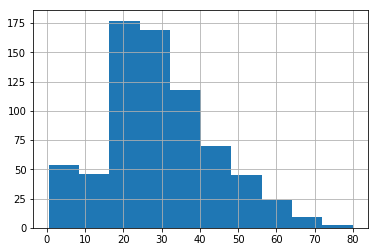

In [15]:
rawdata["Age"].hist()
plt.show()

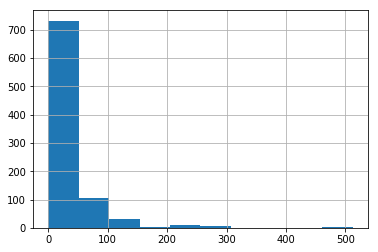

In [16]:
rawdata["Fare"].hist()
plt.show()

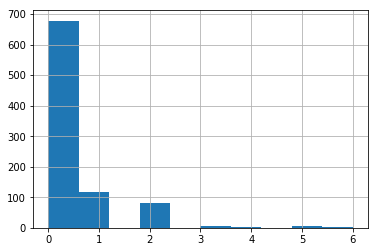

In [17]:
rawdata["Parch"].hist()
plt.show()

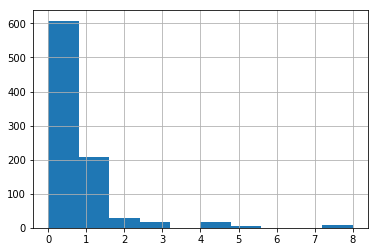

In [18]:
rawdata["SibSp"].hist()
plt.show()

In [19]:
rawdata["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
# establish boolean names

x_bools = list([1,2,3,"Fare low","male","female","Alone","IsKid"])
non_bools = ["Pclass","Name","Age","Embarked","Name Length","Fare segmented","Fare","Sex","PassengerId","nan","Parch","SibSp","Ticket","Survived","Cabin"]
x_bool_complete = [x for x in rawdata.columns if x not in non_bools]

# replace NaNs in age

rawdata["Age"].fillna(0,inplace=True)

# supplementary variables

rawdata = nameLength(rawdata)
rawdata = segmentAge(rawdata)

# creating multi-variable bools

#crossColumns(rawdata,x_bools)

# scale relevant columns

rawdata = scaleData(rawdata,"Age")
rawdata = scaleData(rawdata,"Fare")
rawdata = scaleData(rawdata,"Name Length")

# create dummies

rawdata = dummy(rawdata,"Embarked",list(rawdata["Embarked"].unique()))
rawdata = dummy(rawdata,"Sex",list(rawdata["Sex"].unique()))
rawdata = dummy(rawdata,"Pclass",list(rawdata["Pclass"].unique()))
rawdata = isKid(rawdata,age=18)
rawdata = isAlone(rawdata)

rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Name Length    891 non-null float64
AgeSeg         891 non-null int64
S              891 non-null int64
C              891 non-null int64
Q              891 non-null int64
nan            891 non-null int64
male           891 non-null int64
female         891 non-null int64
3              891 non-null int64
1              891 non-null int64
2              891 non-null int64
IsKid          891 non-null int64
Alone          891 non-null int64
dtypes: float64(3), int64(17), obj

In [25]:
rawdata["Fare segmented"] = [round(x,1) for x in rawdata["Fare"]]
rawdata["Fare low"] = [0 if x < 0.1 else 1 for x in rawdata["Fare segmented"]]

In [26]:
test, train = split(rawdata,test_ratio=0.4)

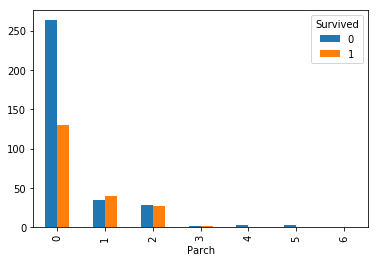

In [27]:
pd.crosstab(train["Parch"],train["Survived"]).plot(kind='bar')

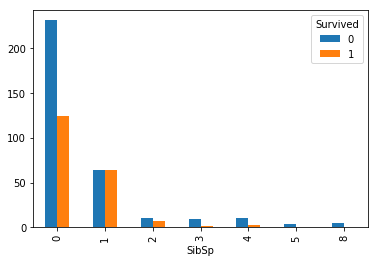

In [28]:
pd.crosstab(train["SibSp"],train["Survived"]).plot(kind='bar')

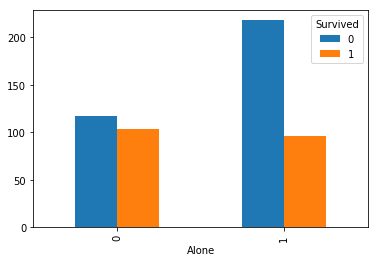

In [29]:
pd.crosstab(train["Alone"],train["Survived"]).plot(kind='bar')

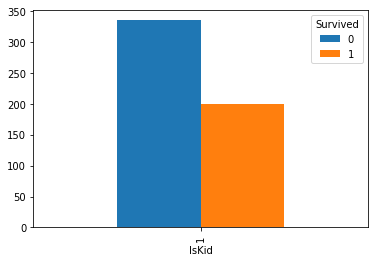

In [30]:
pd.crosstab(train["IsKid"],train["Survived"]).plot(kind='bar')

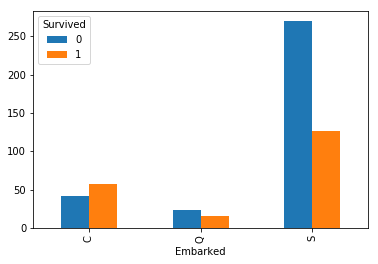

In [31]:
pd.crosstab(train["Embarked"],train["Survived"]).plot(kind='bar')

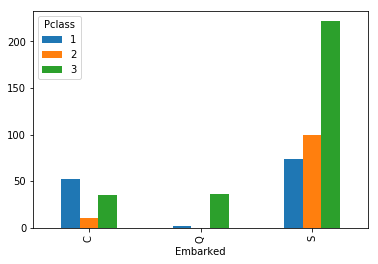

In [32]:
pd.crosstab(train["Embarked"],train["Pclass"]).plot(kind='bar')

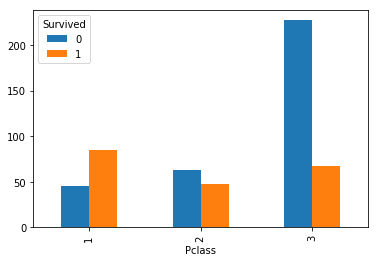

In [33]:
pd.crosstab(train["Pclass"],train["Survived"]).plot(kind='bar')

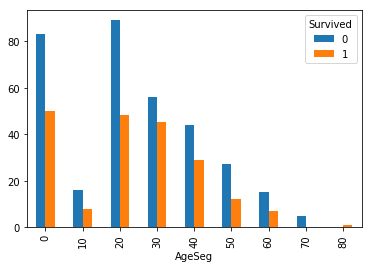

In [34]:
pd.crosstab(train["AgeSeg"],train["Survived"]).plot(kind='bar')
#train["AgeSeg"].value_counts()

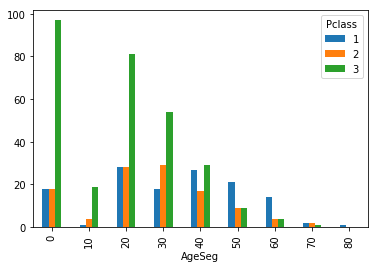

In [35]:
pd.crosstab(train["AgeSeg"],train["Pclass"]).plot(kind='bar')

In [36]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name Length', 'AgeSeg',
       'S', 'C', 'Q', 'nan', 'male', 'female', '3', '1', '2', 'IsKid', 'Alone',
       'Fare segmented', 'Fare low'],
      dtype='object')

In [37]:
y = ["Survived"]
x = list(['1','2','3',"Fare","Name Length","male","female","IsKid","Alone","S","C","Q"])
x_bools = list(["1","2","3","Fare low","male","female","Alone","IsKid"])
print([i in train.columns for i in x])

[True, True, True, True, True, True, True, True, True, True, True, True]


In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(train[x],train[y])
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
import statsmodels.api as sm
logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary())

In [ ]:
logreg = LogisticRegression()
logreg.fit(train[x_bools],train[y])

In [ ]:
y_pred = logreg.predict(test[x])
print("Accuracy of logistic regression on test set: {:.2f}".format(logreg.score(test[x],test[y])))

In [ ]:
# Log reg - first attempt
# cross validation
kfold = model_selection.KFold(n_splits=10,random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
logreg1_results = model_selection.cross_val_score(modelCV,train[x],train[y],cv=kfold,scoring=scoring)
print("10-fold cross val accuracy: ",results)

In [ ]:
logreg1_results.mean()

In [ ]:
# Log reg - Second attempt
# cross validation
kfold = model_selection.KFold(n_splits=10,random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
log_reg_results2 = model_selection.cross_val_score(modelCV,train[x_bool_complete],train[y],cv=kfold,scoring=scoring)
print("10-fold cross val accuracy: ",log_reg_results2)

In [ ]:
confusion_matrix = confusion_matrix(test[y],y_pred)
print(confusion_matrix)

In [ ]:
print("Coef:", "\t\t\t", "Score:")
for i in range(len(x)):
    print(x[i], "\t\t\t", logreg.coef_[0][i])

In [ ]:
### Decision Tree ###
train.columns
dt_x = ["Pclass","male","female","Age","Alone"]

In [ ]:
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=8)
dt.fit(train[dt_x],train[y])

In [ ]:
dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile, feature_names=dt_x)
dotfile.close()

In [ ]:
train_dt_predict = dt.predict(train[dt_x])

In [ ]:
accuracy_score(train_dt_predict,train[y])

In [ ]:
kfold = model_selection.KFold(n_splits=10)
dt2 = tree.DecisionTreeClassifier()
num_trees = 100
bag_model = BaggingClassifier(base_estimator=dt2,n_estimators=num_trees)
bag_results = model_selection.cross_val_score(bag_model,train[dt_x],train[y],cv=kfold)
print(bag_results.mean())

In [ ]:
max_features = 3
rf_model = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
rf_results = model_selection.cross_val_score(rf_model,train[dt_x],train[y],cv=kfold)
print(rf_results.mean())

In [ ]:
ada_boost_model = AdaBoostClassifier(n_estimators=num_trees)
ada_boost_results = model_selection.cross_val_score(ada_boost_model,train[dt_x],train[y],cv=kfold)
print(ada_boost_results.mean())

In [ ]:
grad_boost_model = GradientBoostingClassifier(n_estimators=num_trees)
grad_boost_results = model_selection.cross_val_score(grad_boost_model,train[dt_x],train[y],cv=kfold)
print(results.mean())

In [ ]:
dt_x

In [ ]:
# base Decision Tree

dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile, feature_names=dt_x)
dotfile.close()

# bagged Tree

dotfile = open("bagged_dt.dot", 'w')
tree.export_graphviz(rf_model, out_file=dotfile, feature_names=dt_x)
dotfile.close()

# Random Forrest

dotfile = open("random_f.dot", 'w')
tree.export_graphviz(bagged_model, out_file=dotfile, feature_names=dt_x)
dotfile.close()

# Ada Boost

dotfile = open("ada_boost.dot", 'w')
tree.export_graphviz(ada_boost_model, out_file=dotfile, feature_names=dt_x)
dotfile.close()

# Stochastic Gradient Boost

dotfile = open("sg_boost.dot", 'w')
tree.export_graphviz(gradient_boost_model, out_file=dotfile, feature_names=dt_x)
dotfile.close()

In [44]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name Length', 'AgeSeg',
       'S', 'C', 'Q', 'nan', 'male', 'female', '3', '1', '2', 'IsKid', 'Alone',
       'Fare segmented', 'Fare low'],
      dtype='object')

In [45]:
len(x_bools)

8

In [58]:
### NEURAL NETWORK ###

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation

In [59]:
nn = Sequential()

In [60]:
nn.add(Dense(8, input_dim=len(x_bools),activation='relu'))
nn.add(Dense(8,activation='relu'))
nn.add(Dense(1,activation='sigmoid'))

adam_opt = keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999, epsilon=None, decay=0.0)

def cross_entr(y_true,y_pred):
    return(keras.losses.binary_crossentropy(y_true,y_pred))

def mean_pred(y_true,y_pred):
    return(K.mean(y_pred))

nn.compile(loss=cross_entr, optimizer=adam_opt, metrics=[mean_pred])

TypeError: sigmoid_cross_entropy_with_logits() got an unexpected keyword argument 'labels'